## Setup

#### First read in data

Data is generated from 448 simulations of alanine dipeptide, each 300000 steps (300 picoseconds)

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload  

# Package for running/processing hyperdyanmics run (example)
#import hyperdynamics as hd

In [46]:
import ramaplots as rm
import hdclass as hdclass

In [31]:
reload(rm)

<module 'ramaplots' from '/home/laura/lanl-clean/hyperdynamics/ramaplots.py'>

In [210]:
reload(hdclass)

<module 'hdclass' from '/home/laura/lanl-clean/hyperdynamics/hdclass.py'>

In [13]:
path_to_data = "../trajectory-data/"
all_dihed_data = []
for run_n in range(1,20):#449):
    data_file = "{}diala.{}.diheds.dat".format(path_to_data, run_n)
    data = np.genfromtxt(data_file, usecols=[1,2])
    all_dihed_data.append(data[::2])

#### Initialize run

Use the DihedralHD class to control our simulation. Here, we call it to initialize it before any data is added

In [393]:
reload(rm)
reload(hdclass)

<module 'hdclass' from '/home/laura/lanl-clean/hyperdynamics/hdclass.py'>

In [394]:
sample_run = hdclass.DihedralHD(2, sample_interval=0.04)

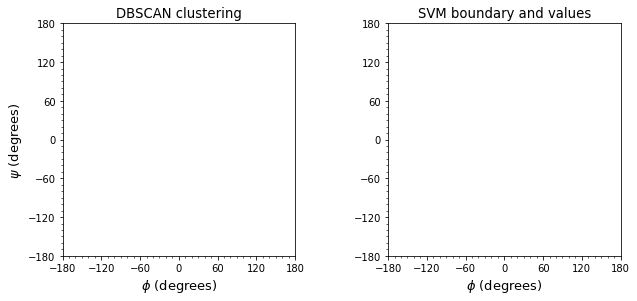

In [392]:
sample_run.update_boundary()
sample_run.plot_boundary()
plt.savefig("../images/gif/0.png", dpi=300)


In [384]:
traj_n = 18
t1, t2, = 0, 100
sample_run.update_data(all_dihed_data[traj_n][t1:t2])

in no-man's land


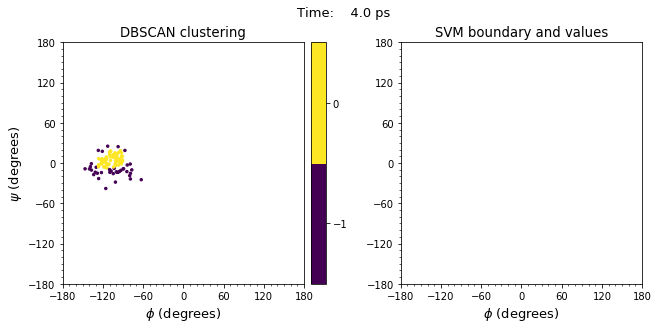

In [373]:
sample_run.update_boundary()
sample_run.plot_boundary(time=True)

In [385]:
t1, t2, = 100,500
sample_run.update_data(all_dihed_data[traj_n][t1:t2])

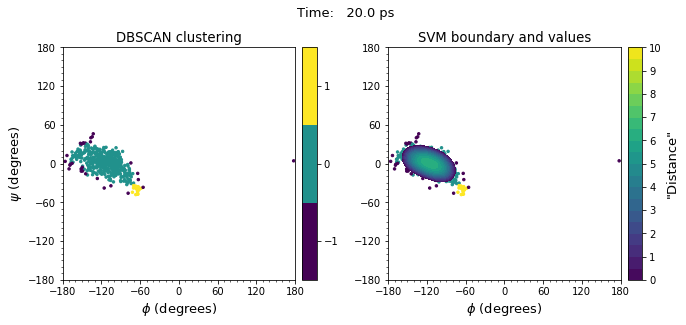

In [390]:
sample_run.update_boundary()
sample_run.plot_boundary(time=True)
plt.savefig("../images/gif/test.png", dpi=300)

In [315]:
sample_run.reset()

In [251]:
n_samples = len(all_dihed_data[traj_n])
print("We have {} total number of steps to sample".format(n_samples))

We have 7500 total number of steps to sample


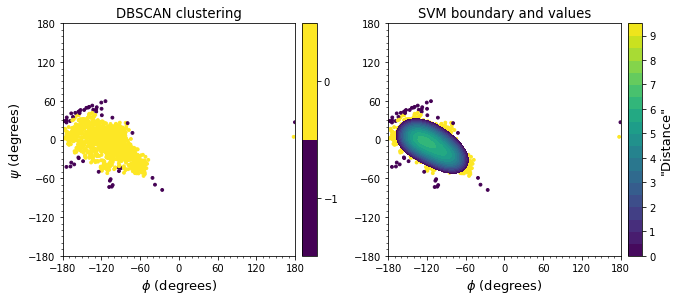

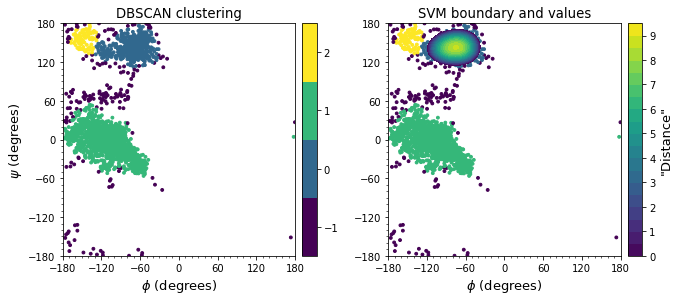

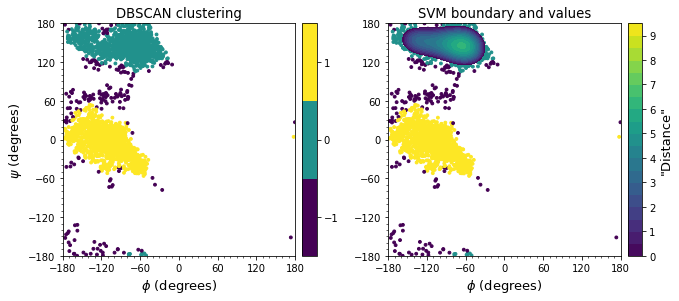

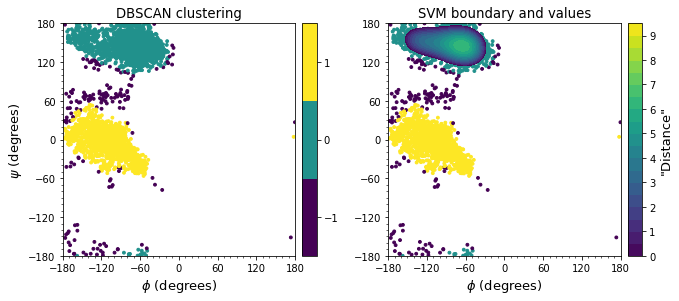

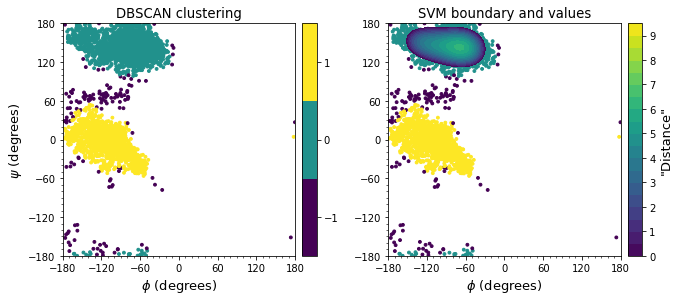

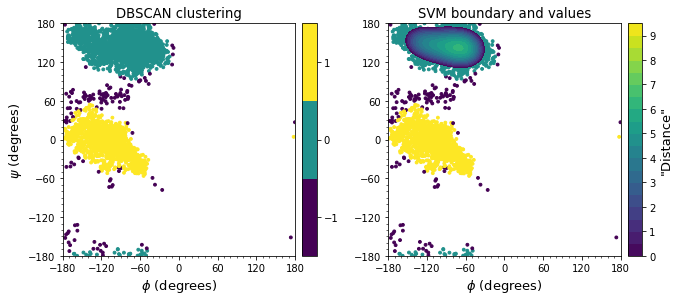

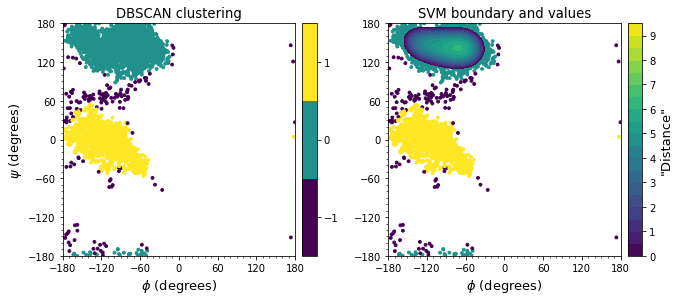

In [241]:
x = 100
for t1 in range(500,n_samples,x):
    t2 = t1+x
    sample_run.update_data(all_dihed_data[traj_n][t1:t2])
    sample_run.update_boundary()
    sample_run.plot_boundary()

in no-man's land
in no-man's land
in no-man's land
in no-man's land
in no-man's land
in no-man's land


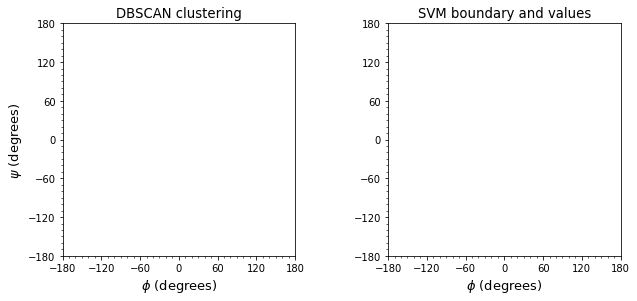

In [395]:
# Make gif
i=0
sample_run.plot_boundary()
plt.savefig("../images/gif/{}.png".format(i), dpi=300)
x = 100
for t1 in range(0,n_samples,x):
    i+=1
    t2 = t1+x
    sample_run.update_data(all_dihed_data[traj_n][t1:t2])
    sample_run.update_boundary()
    sample_run.plot_boundary(time=True)
    plt.savefig("../images/gif/{}.png".format(i), dpi=300)
    plt.close()

 ***

### Extending to multiple simulations

In [244]:
sample_multi_run = hdclass.DihedralHD(2, sample_interval=0.04)#, num_simulations=20)

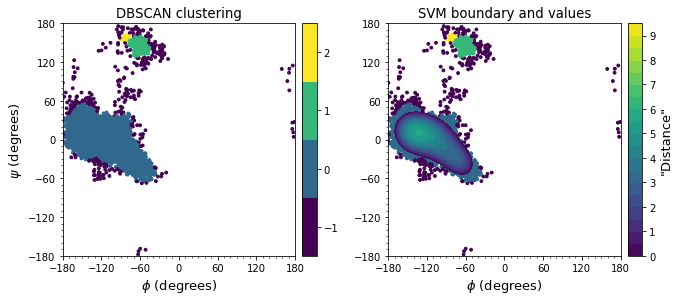

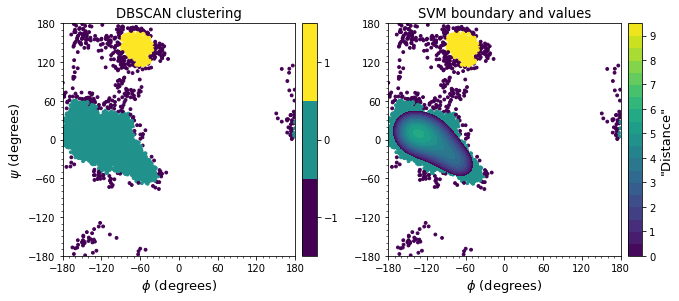

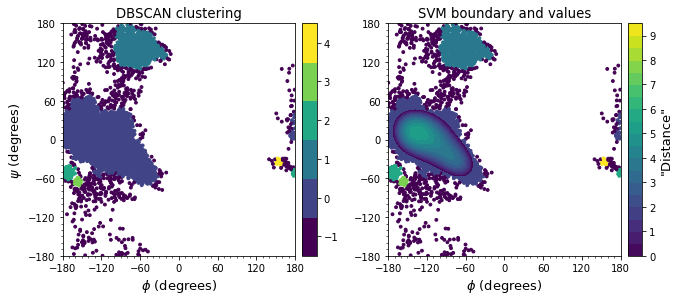

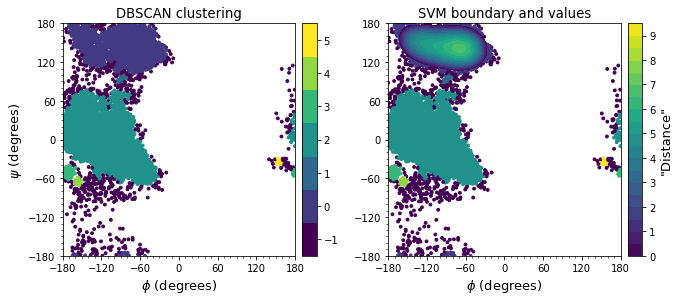

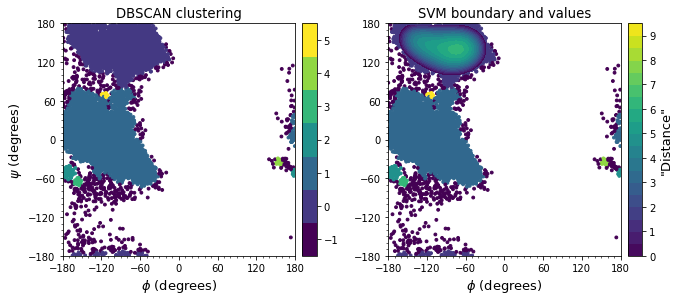

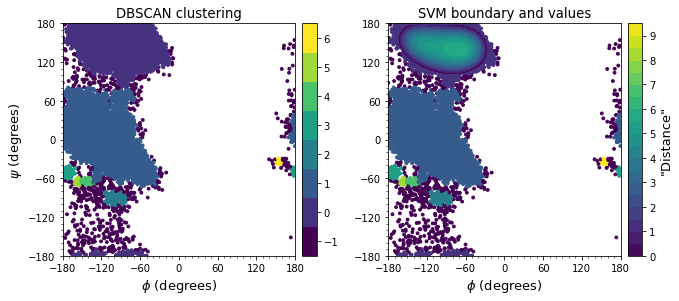

In [245]:
x = 500
for t1 in range(0,3000,x):
    t2 = t1+x
    for d in all_dihed_data[:20]:
        sample_multi_run.update_data(d[t1:t2])
    sample_multi_run.update_boundary(cluster_e=0.1, svm_n=0.05)
    sample_multi_run.plot_boundary()

***

# Next steps

This method still has a long way to go before it could be reliably implemented as a sampling technique. Immediately a few things are clear: 

1) This method is sensitive to DBSCAN and SVM parameters, particularly $\epsilon$  (e) in DBSCAN and $\nu$ (n) in SVM. These would likely need to be tuned to each system, which may be difficult in new systems where there is little intuition.

2) Additionally, we need a way to account for increasing density in transition regions with long simulations. Eventually, even if it's rare, the density becomes high enough for DBSCAN to include in a region, which we don't want. This would most easily be addressed by either adjusting the parameters as a function of simulation time and number of samples, or by subsampling the number of samples. 

3) This is going to become more costly as simulations get longer--subsampling as mentioned in 2) could help with this.

4) Precise implementation, ie, how often to recluster and redraw boundaries, needs to be tuned.

5) Finally, obviously, this is yet not interfaced with a simulation engine.

`look here`

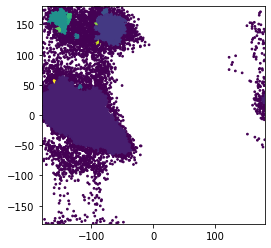

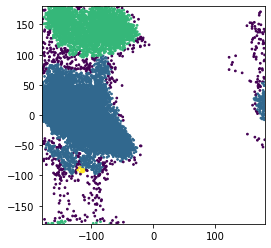

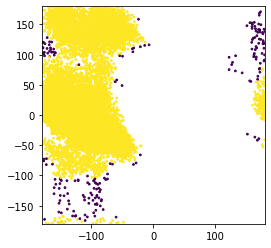

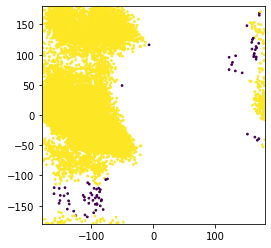

KeyboardInterrupt: 

In [188]:
for e in [0.05, 0.08, 0.1]:
    sample_run.cluster(e=e, mn=15)

    fig, ax = plt.subplots(1, figsize=(4,4))
    plt.xlim([-180,180])
    plt.ylim([-180,180])
    plt.scatter(sample_run.data[:,0], sample_run.data[:,1], s=3, c=sample_run.labels)
    plt.show()

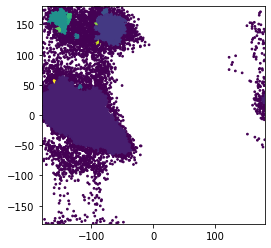

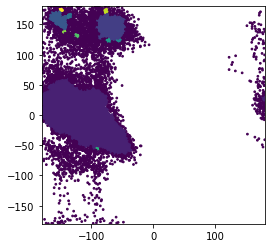

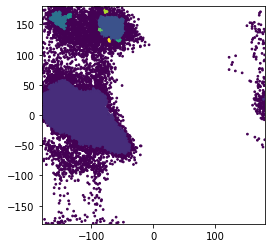

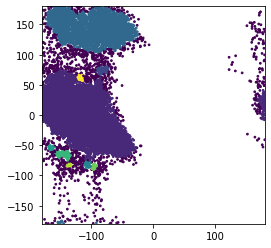

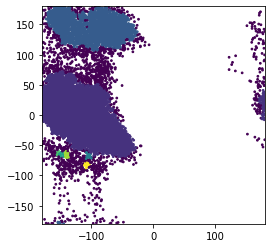

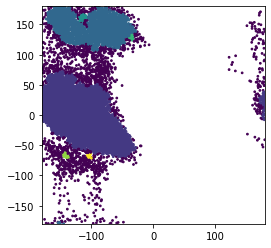

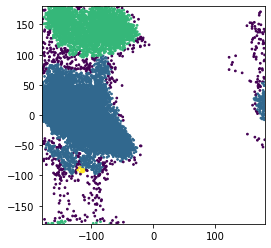

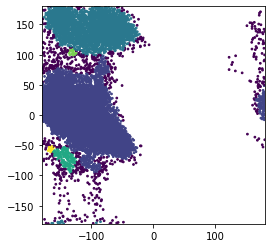

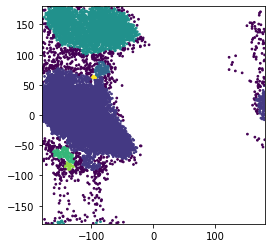

In [190]:
for e in [0.05, 0.08, 0.1]:
    for m in [15, 18, 20]:
        sample_run.cluster(e=e, mn=m)

        fig, ax = plt.subplots(1, figsize=(4,4))
        plt.xlim([-180,180])
        plt.ylim([-180,180])
        plt.scatter(sample_run.data[:,0], sample_run.data[:,1], s=3, c=sample_run.labels)
        plt.show()

$\nu$

in no-man's land


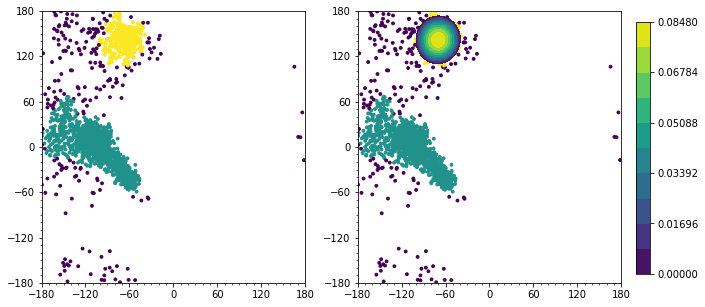

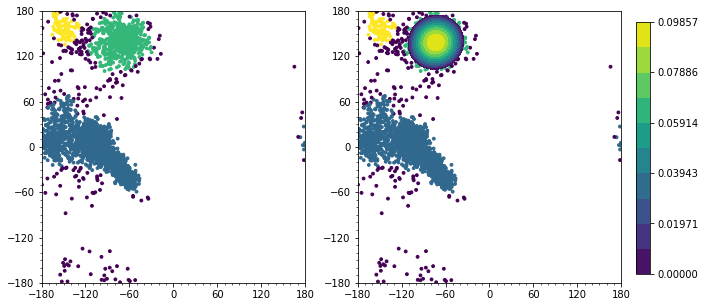

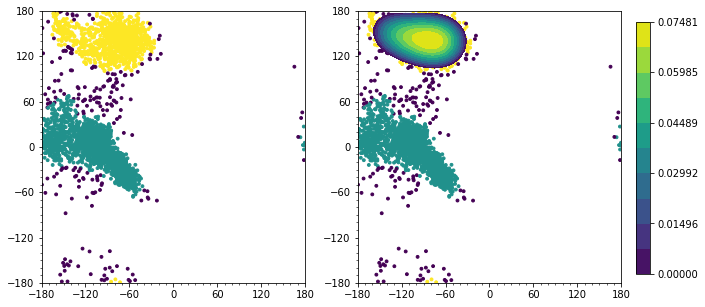

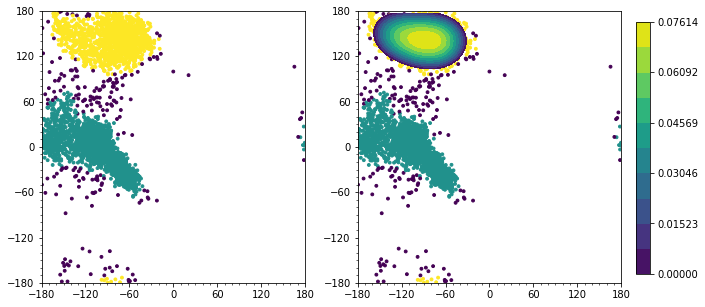

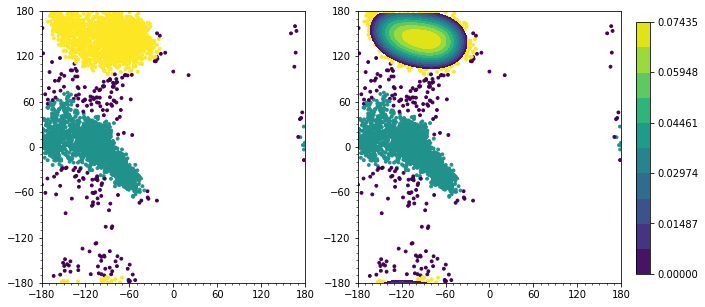

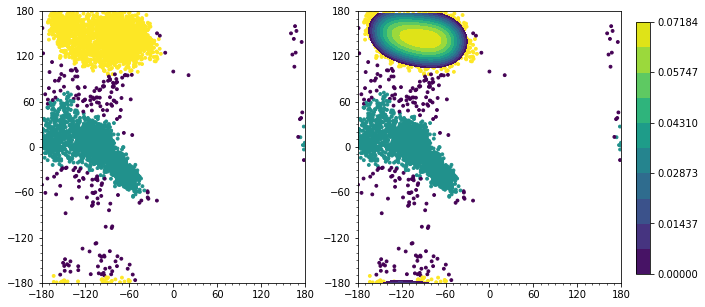

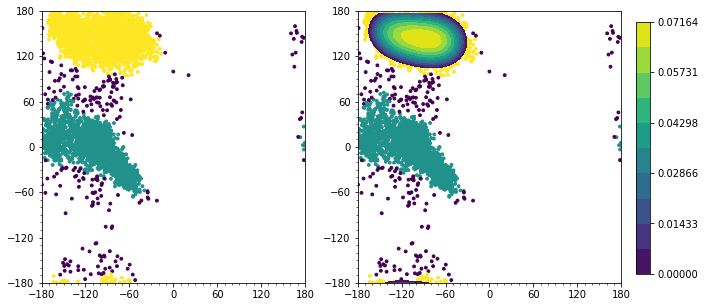

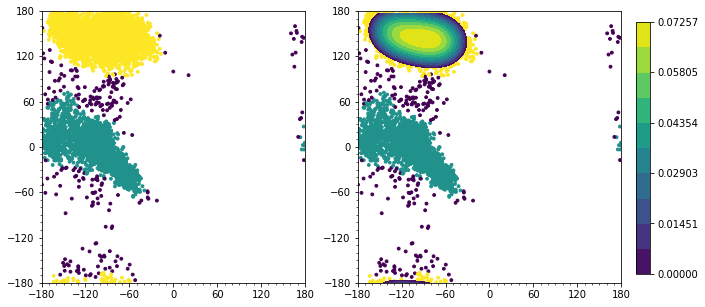

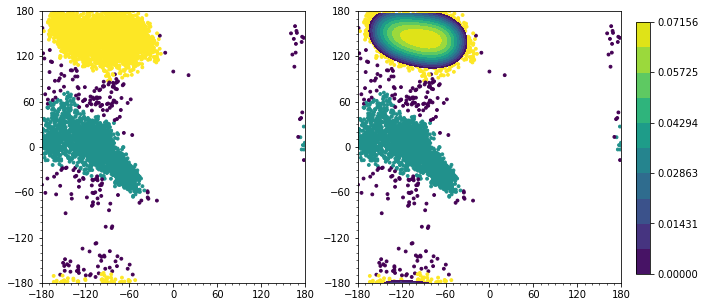

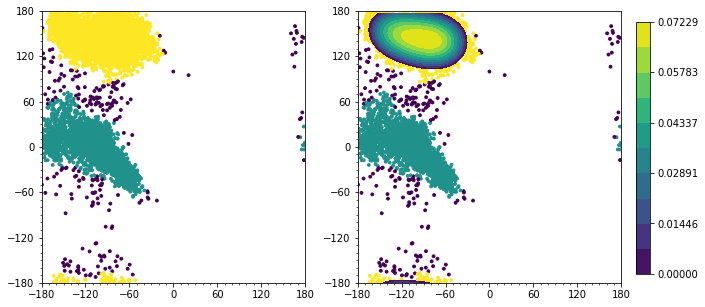

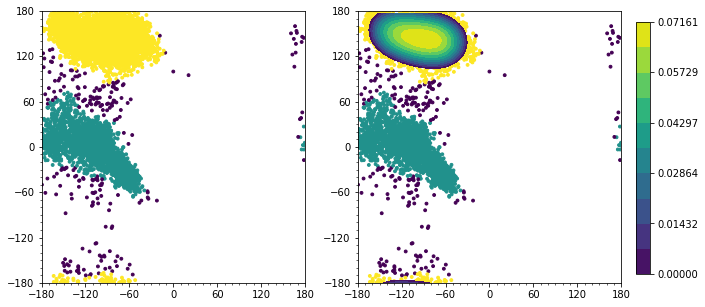

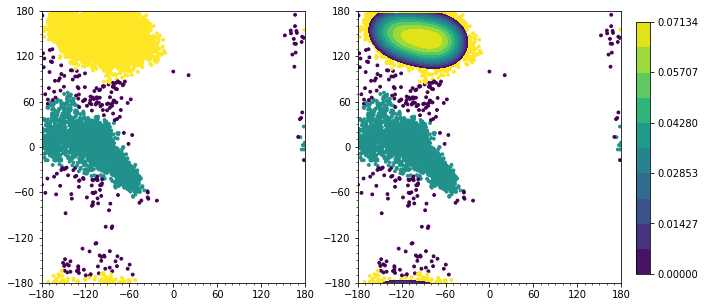

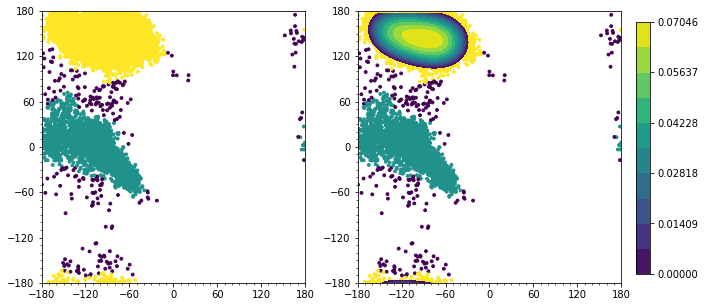

In [218]:
sample_run.reset()
sample_run.update_data(all_dihed_data[10][:200])
x = 200
for t1 in range(200,3000,x):
    t2 = t1+x
    samples_now = []
    for d in all_dihed_data[:5]:
        samples_now.extend(d[t1:t2])    
    
    sample_run.update_data(np.array(samples_now))
    #sample_run.update_data(all_dihed_data[10][t1:t2])

    sample_run.cluster(e=0.15, mn=15)
    sample_run.svm1(g='scale', n=0.05)

    if sample_run.svm is not None:
        sample_run.plot_boundary()
        #fig, ax = plt.subplots(1, figsize=(4,4))
        #plt.xlim([-180,180])
        #plt.ylim([-180,180])
        #plt.scatter(sample_run.data[:,0], sample_run.data[:,1], s=3, c=sample_run.labels)
        plt.show()

### trying to do scaling

In [ ]:
sample_run = traj.DihedralHD(2,0.01)
sample_run.update_data(all_dihed_data[10][:200])
x = 200
for t1 in range(200,3000,x):
    t2 = t1+x
    samples_now = []
    for d in all_dihed_data[:5]:
        samples_now.extend(d[t1:t2])    
    
    sample_run.update_data(np.array(samples_now))
    #sample_run.update_data(all_dihed_data[10][t1:t2])

    sample_run.cluster(e=0.15, mn=15)
    sample_run.svm1(g='scale', n=0.1)

    if sample_run.svm is not None:
        sample_run.plot_boundary()
        #fig, ax = plt.subplots(1, figsize=(4,4))
        #plt.xlim([-180,180])
        #plt.ylim([-180,180])
        #plt.scatter(sample_run.data[:,0], sample_run.data[:,1], s=3, c=sample_run.labels)
        plt.show()

In [270]:
x = np.arange(-180,180,3)
y = np.arange(-180,180,3)
X,Y = np.meshgrid(x,y)
cosXY = dih.angles_to_feature(np.stack([X.flatten(),Y.flatten()], axis=-1))

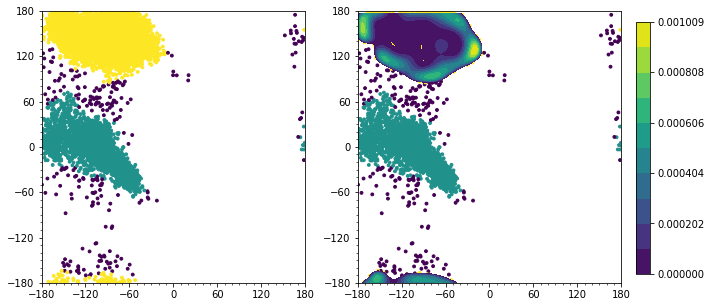

In [277]:
sample_run.svm1(g='scale', n=0.001)
cosXY_scale = sample_run.scaler.transform(cosXY)
Z = (sample_run.svm.decision_function(cosXY_scale))/len(sample_run.svm.support_)
Z = Z.reshape(X.shape)
RM.scat2dists(sample_run.data, sample_run.labels, X, Y, Z)

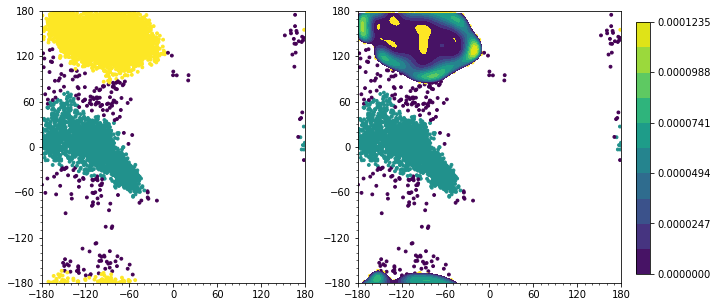

In [268]:
sample_run.svm1(g='scale', n=0.0001)
sample_run.plot_boundary()

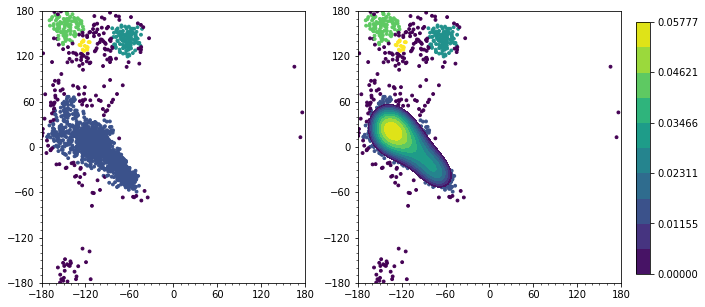

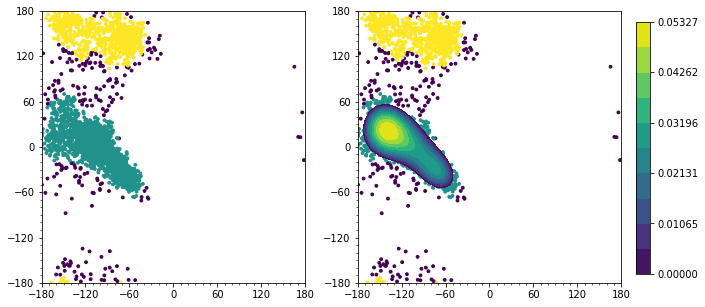

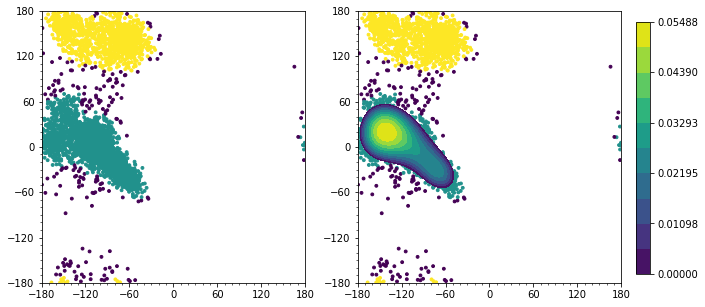

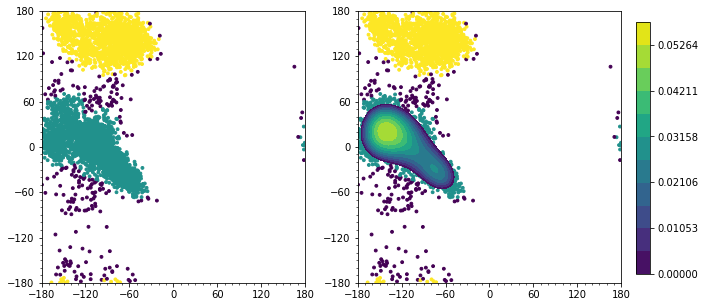

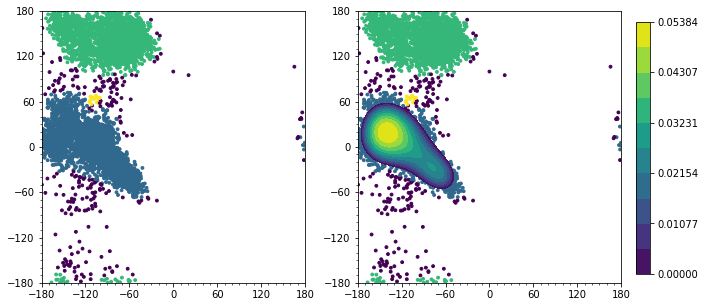

in no-man's land


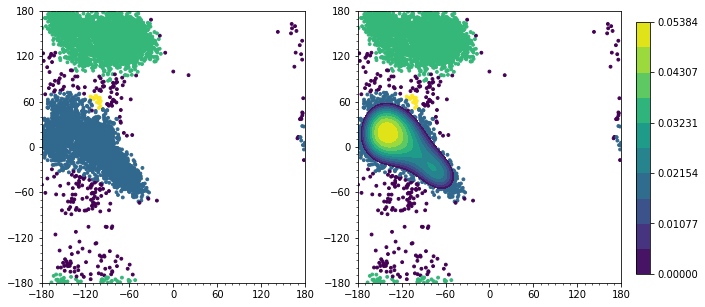

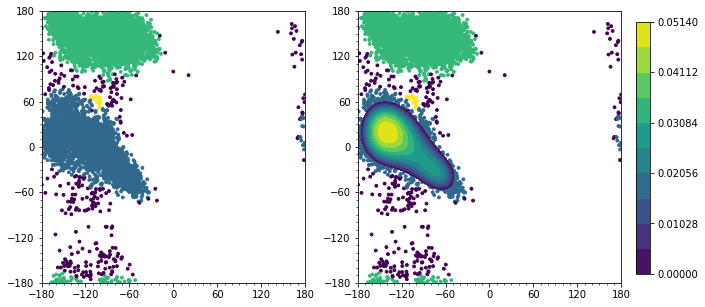

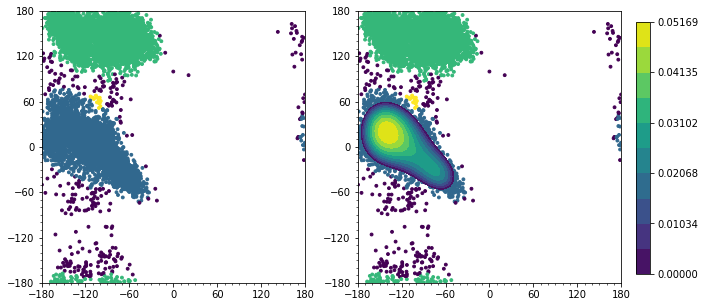

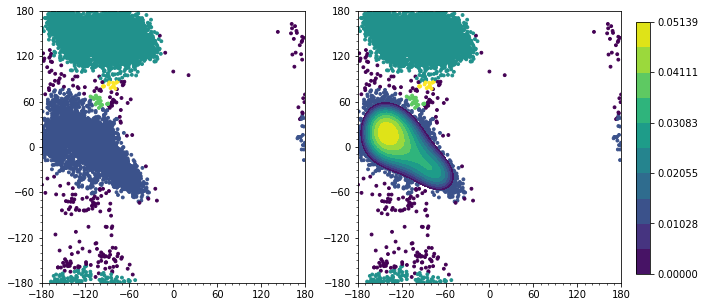

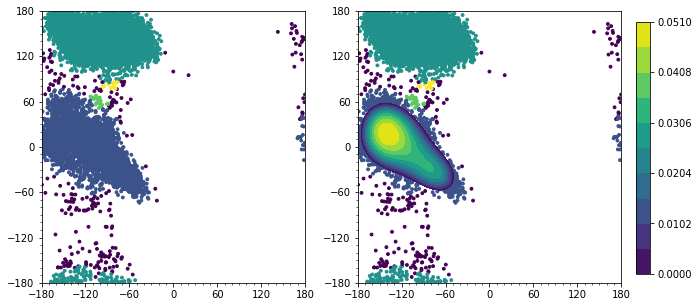

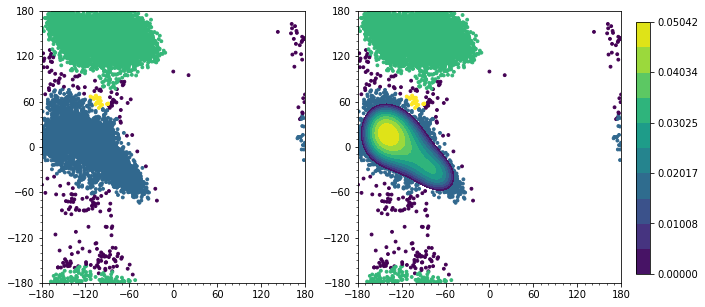

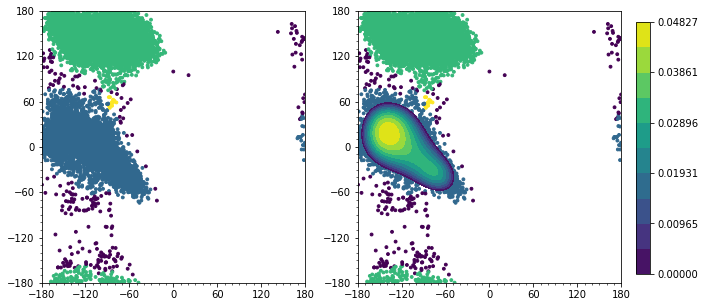

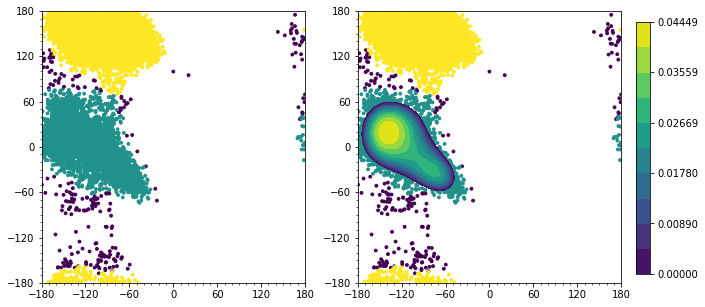

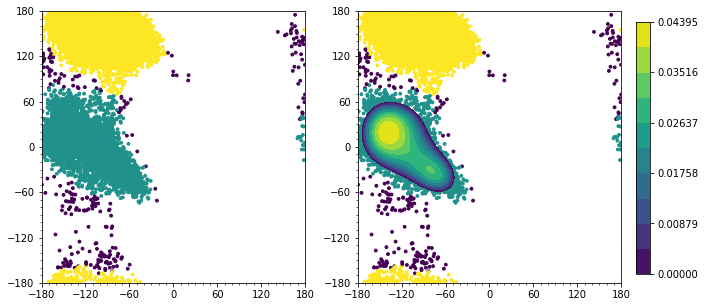

In [219]:
sample_run.reset()
sample_run.update_data(all_dihed_data[10][:200])
x = 200
for t1 in range(200,3000,x):
    t2 = t1+x
    samples_now = []
    for d in all_dihed_data[:10]:
        samples_now.extend(d[t1:t2])    
    
    sample_run.update_data(np.array(samples_now))
    #sample_run.update_data(all_dihed_data[10][t1:t2])

    sample_run.cluster(e=0.15, mn=15)
    sample_run.svm1(g='scale', n=0.05)

    if sample_run.svm is not None:
        sample_run.plot_boundary()
        #fig, ax = plt.subplots(1, figsize=(4,4))
        #plt.xlim([-180,180])
        #plt.ylim([-180,180])
        #plt.scatter(sample_run.data[:,0], sample_run.data[:,1], s=3, c=sample_run.labels)
        plt.show()

# HERE: Figure out best parameters again I guess?
## Where should scaling go? Just do it in SVM step for values in region?
## Plotting functions